<a href="https://colab.research.google.com/github/Deriss/Projeto-de-Redes-Neurais-Artificiais-para-IoT/blob/main/Reconhecimento_de_Imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de alimentos

Nesse projeto uma rede neural convolucional será treinada para a classificação de imagens de dez tipos de alimentos:
- Pizza
- Salmão Grelhado
- Sushi
- Ramen
- Chicken curry
- Hamburger
- Bife
- Arroz frito
- Sorvete
- Assas de frango

# Importar Bibliotecas

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Carregar dados

Os dados foram obtidos do curso "Zero to Mastery Deep Learning with TensorFlow" da ZTM. São 750 imagens de treino e 250 imagens de validação para cada tipo de alimento.

In [5]:
_URL = 'https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip'
zip_dir = tf.keras.utils.get_file('10_food_classes_all_data.zip', origin=_URL, extract=True)

519183241/519183241 [==============================] - 7s 0us/step


In [6]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/__MACOSX
/root/.keras/datasets/__MACOSX/10_food_classes_all_data
/root/.keras/datasets/__MACOSX/10_food_classes_all_data/test
/root/.keras/datasets/__MACOSX/10_food_classes_all_data/test/fried_rice
/root/.keras/datasets/__MACOSX/10_food_classes_all_data/test/ice_cream
/root/.keras/datasets/__MACOSX/10_food_classes_all_data/test/chicken_wings
/root/.keras/datasets/__MACOSX/10_food_classes_all_data/test/sushi
/root/.keras/datasets/__MACOSX/10_food_classes_all_data/test/grilled_salmon
/root/.keras/datasets/__MACOSX/10_food_classes_all_data/test/pizza
/root/.keras/datasets/__MACOSX/10_food_classes_all_data/test/ramen
/root/.keras/datasets/__MACOSX/10_food_classes_all_data/test/hamburger
/root/.keras/datasets/__MACOSX/10_food_classes_all_data/test/chicken_curry
/root/.keras/datasets/__MACOSX/10_food_classes_all_data/test/steak
/root/.keras/datasets/__MACOSX/10_food_classes_all_data/train
/root/.keras/datasets/__MACOSX/10_food_classes_all_data/trai

In [7]:
base_dir = os.path.join(os.path.dirname(zip_dir), '10_food_classes_all_data')
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')


# Parâmetros

In [8]:
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32


# Preparação e carregamento dos dados

In [96]:
train_image_generator      = ImageDataGenerator(rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

In [97]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SHAPE,
                                                           class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [98]:
test_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=test_dir,
                                                              shuffle=False,
                                                              target_size=IMAGE_SHAPE,
                                                              class_mode='categorical')

Found 2500 images belonging to 10 classes.


### Visualização das imagens de treino

In [99]:
sample_training_images, _ = next(train_data_gen)

In [100]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

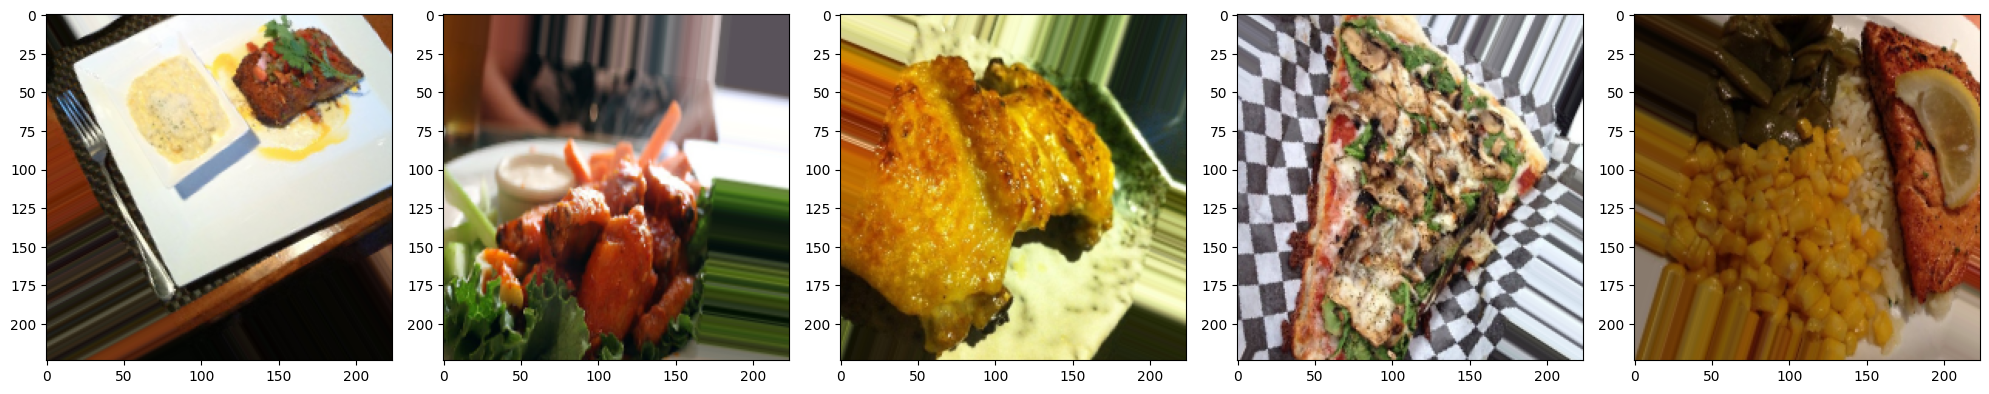

In [101]:
plotImages(sample_training_images[:5])  # Plot images 0-4

In [102]:
for dirpath, dirnames, filenames in os.walk(base_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/root/.keras/datasets/10_food_classes_all_data'.
There are 10 directories and 0 images in '/root/.keras/datasets/10_food_classes_all_data/test'.
There are 0 directories and 250 images in '/root/.keras/datasets/10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '/root/.keras/datasets/10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '/root/.keras/datasets/10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '/root/.keras/datasets/10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '/root/.keras/datasets/10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '/root/.keras/datasets/10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '/root/.keras/datasets/10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '/root/.keras/datasets/10

# Modelo

In [103]:
from tensorflow.keras.regularizers import l1

In [104]:
model = tf.keras.models.Sequential([


    tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
   # tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu', activity_regularizer= l1(0.001)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10,activation='softmax') # 10 classes

])

In [105]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Treinamento do modelo

In [106]:
EPOCHS = 10
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(7500 / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=test_data_gen,
    validation_steps=int(np.ceil(2500 / float(BATCH_SIZE)))
)

Epoch 1/10
235/235 [==============================] - 110s 457ms/step - loss: 2.2224 - accuracy: 0.1696 - val_loss: 2.1452 - val_accuracy: 0.2072
Epoch 2/10
235/235 [==============================] - 110s 467ms/step - loss: 2.1401 - accuracy: 0.2179 - val_loss: 2.0038 - val_accuracy: 0.2868
Epoch 3/10
235/235 [==============================] - 111s 473ms/step - loss: 2.0748 - accuracy: 0.2548 - val_loss: 1.9343 - val_accuracy: 0.3272
Epoch 4/10
235/235 [==============================] - 107s 454ms/step - loss: 2.0057 - accuracy: 0.2939 - val_loss: 1.9051 - val_accuracy: 0.3480
Epoch 5/10
235/235 [==============================] - 112s 476ms/step - loss: 1.9488 - accuracy: 0.3255 - val_loss: 1.7845 - val_accuracy: 0.4148
Epoch 6/10
235/235 [==============================] - 110s 468ms/step - loss: 1.8909 - accuracy: 0.3452 - val_loss: 1.9151 - val_accuracy: 0.3468
Epoch 7/10
235/235 [==============================] - 107s 456ms/step - loss: 1.8791 - accuracy: 0.3561 - val_loss: 1.6745 -

In [108]:
EPOCHS = 5
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(7500 / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=test_data_gen,
    validation_steps=int(np.ceil(2500 / float(BATCH_SIZE)))
)

Epoch 1/5
235/235 [==============================] - 109s 462ms/step - loss: 1.7414 - accuracy: 0.4145 - val_loss: 1.5304 - val_accuracy: 0.4952
Epoch 2/5
235/235 [==============================] - 106s 452ms/step - loss: 1.6967 - accuracy: 0.4316 - val_loss: 1.5790 - val_accuracy: 0.4796
Epoch 3/5
235/235 [==============================] - 107s 454ms/step - loss: 1.6508 - accuracy: 0.4508 - val_loss: 1.6867 - val_accuracy: 0.4388
Epoch 4/5
235/235 [==============================] - 110s 467ms/step - loss: 1.6350 - accuracy: 0.4547 - val_loss: 1.4864 - val_accuracy: 0.5168
Epoch 5/5
235/235 [==============================] - 107s 456ms/step - loss: 1.5779 - accuracy: 0.4789 - val_loss: 1.4854 - val_accuracy: 0.5280


### Visualização treinamento

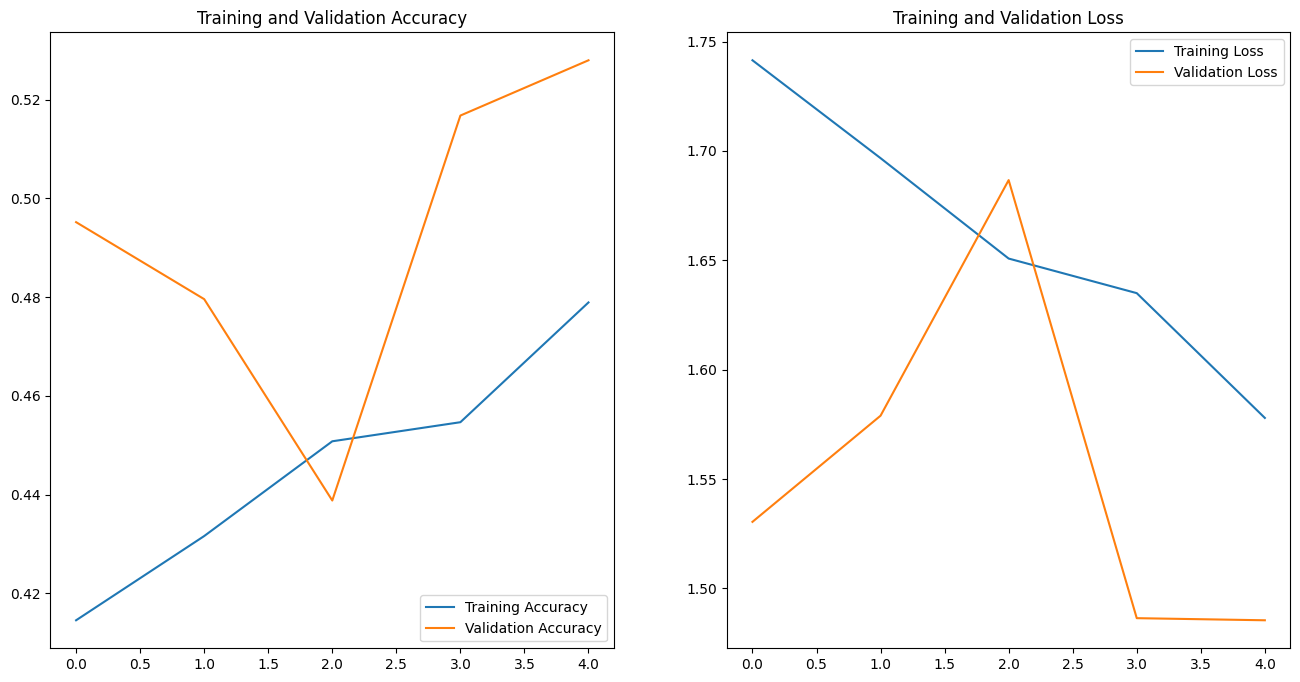

In [109]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

Podemos ver que devido ao data augmentation, a acuracia é maior na validação do que nos dados de treino. De forma similar, o valor da função objetivo é menor na validação.

In [110]:
#Predict
y_prediction = model.predict(test_data_gen)
y_prediction = np.argmax (y_prediction, axis = 1)


79/79 [==============================] - 7s 93ms/step


In [29]:
y_test = test_data_gen.classes

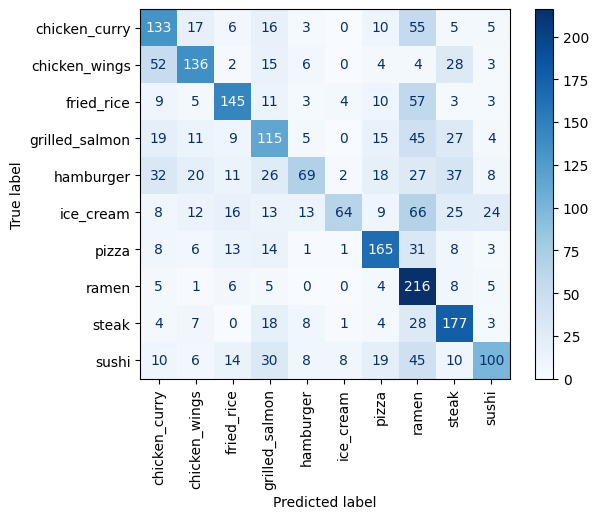

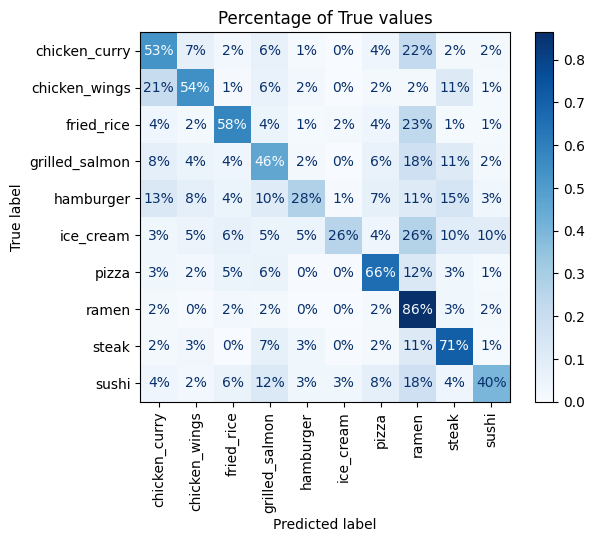

In [111]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_prediction)

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_prediction,
                                               display_labels=list(test_data_gen.class_indices.keys()),
                                               xticks_rotation='vertical',
                                               cmap=plt.cm.Blues)
plt.show()

disp_norm = ConfusionMatrixDisplay.from_predictions(y_test, y_prediction,
                                                    normalize='true',
                                                    values_format='.0%',
                                               display_labels=list(test_data_gen.class_indices.keys()),
                                               xticks_rotation='vertical',
                                               cmap=plt.cm.Blues)
plt.title('Percentage of True values')
plt.show()

O modelo tem maior facilidade para identificar o ramen e o steak, porém tem grande dificuldades para detectar corretamente o hamburger e o sorvete(ice cream).